In [129]:
%reset -f

# Part 1: Initial Setup and Parsing the LAS File


In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Path to your LAS file
file_path = './422393367200_WRA-1009_TCOM_2-26-16.las'

# Lists to hold the depth and log data (multiple logs)
depths = []
log_data = []

# Reading the LAS file manually
data_section = False  # To identify the start of the data section

with open(file_path, 'r') as las_file:
    for line in las_file:
        line = line.strip()  # Remove any leading/trailing whitespace

        # Look for the start of the data section (~A is the standard in LAS files)
        if line.startswith("~A"):
            data_section = True
            continue  # Skip the "~A" line itself

        # If we're in the data section, process the data
        if data_section:
            # Split the data line into components (assuming space-separated values)
            parts = line.split()
            if len(parts) >= 2:  # Ensure there are enough columns
                try:
                    # Convert the first column to depth and the rest to log data
                    depth = float(parts[0])
                    logs = [float(value) for value in parts[1:]]  # Store remaining columns as logs
                    # Only add valid data (exclude -9999 values)
                    if depth != -9999 and all(val != -9999 for val in logs):
                        depths.append(depth)
                        log_data.append(logs)
                except ValueError:
                    # Handle any lines that don't contain valid data
                    continue

# Convert to numpy arrays
depths = np.array(depths, dtype="float32")

# Convert depth from feet to meters (1 foot = 0.3048 meters)
depths = depths * 0.3048

log_data = np.array(log_data, dtype="float32")




In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Define the formation tops in meters
formations = [
    
    {"name": "Glasscock", "top": 5465.68 * 0.3048},
    {"name": "Glasscock Base", "top": 5521.79 * 0.3048}
  
]

# Part 2: Visualizing All Log Data

## Density Log

No handles with labels found to put in legend.


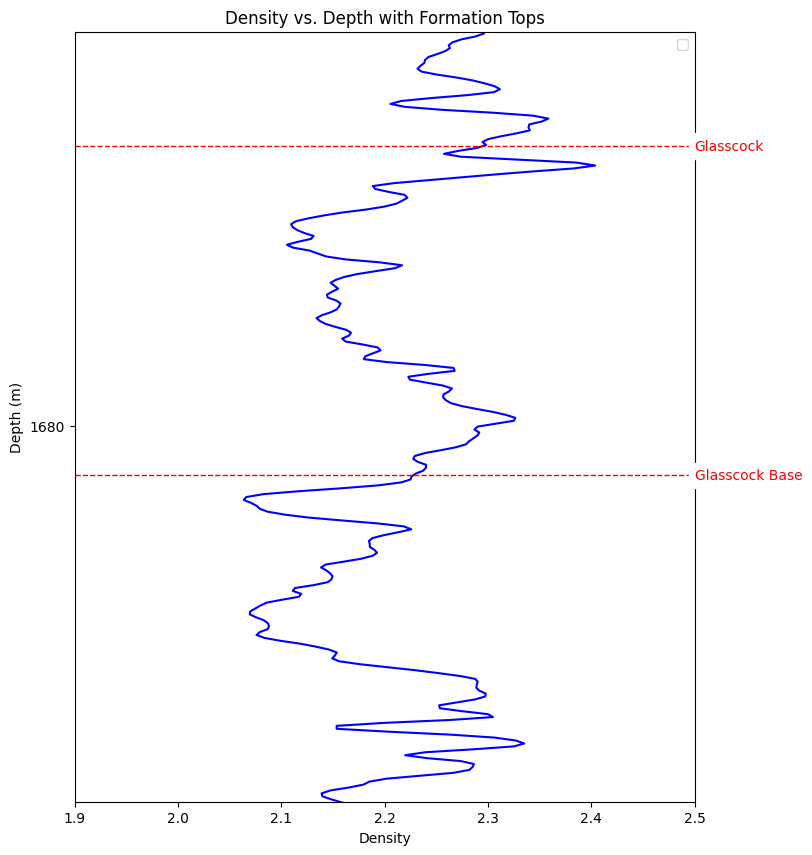

In [132]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_DEN = log_data[:, 24]  # Customize this based on your parameter names and number of column

# Plotting the selected log against depth
plt.figure(figsize=(8, 10))
plt.plot(log_DEN, depths, color='blue')
plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter
plt.xlim(1.9, 2.5)

# Set y-axis range for depth
plt.ylim(1910, 1500)

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Density')
plt.ylabel('Depth (m)')

plt.ylim(1700, 1660)

plt.title('Density vs. Depth with Formation Tops')
plt.legend()
plt.show()


## Neutron Porosity Log

In [133]:
log_NPRD = log_data[:, 20] # Customize this based on your parameter names
log_NPRL = log_data[:, 19] # Customize this based on your parameter names
log_NPRS = log_data[:, 4] # Customize this based on your parameter names


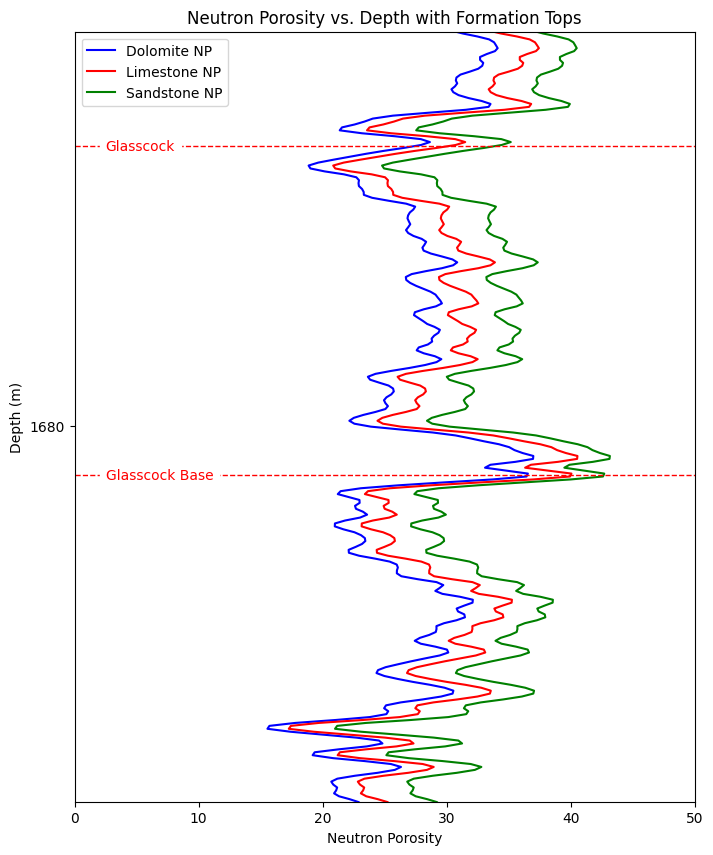

In [134]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)


# Plotting the selected log against depth
plt.figure(figsize=(8, 10))
plt.plot(log_NPRD, depths, color='blue', linestyle='-', label='Dolomite NP')
plt.plot(log_NPRL, depths, color='red', linestyle='-', label='Limestone NP')
plt.plot(log_NPRS, depths, color='green', linestyle='-', label='Sandstone NP')

plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Neutron Porosity')
plt.ylabel('Depth (m)')
plt.xlim(0, 50)

plt.ylim(1700, 1660)

plt.title(f'Neutron Porosity vs. Depth with Formation Tops')
plt.legend()
plt.show()


In [135]:
log_DPRD = log_data[:, 23] # Dolomite Density Por
log_DPRL = log_data[:, 22] # Limestone Density Por
log_DPRS = log_data[:, 7] # Sandstone Density Por.

log_NPOR = log_data[:, 18] # Base Neutron Porosity

log_DPOR = log_data[:, 21] # Base Density Porosity (exact the same with sandstone Density porosity)

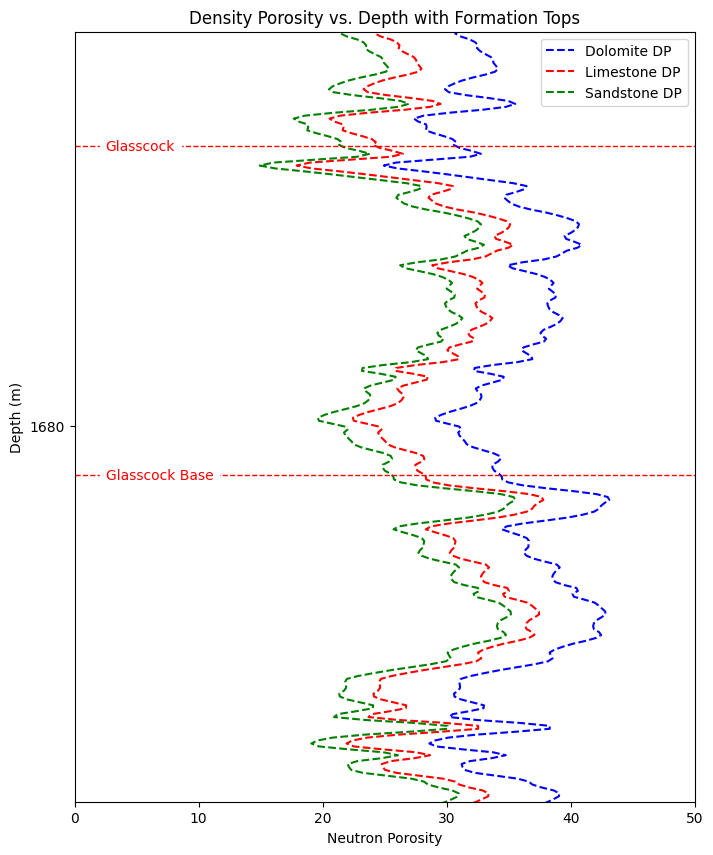

In [136]:
plt.figure(figsize=(8, 10))

plt.plot(log_DPRD, depths, color='blue', linestyle='--', label='Dolomite DP')
plt.plot(log_DPRL, depths, color='red', linestyle='--', label='Limestone DP')
plt.plot(log_DPRS, depths, color='green', linestyle='--', label='Sandstone DP')




plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Neutron Porosity')
plt.ylabel('Depth (m)')
plt.xlim(0, 50)

plt.ylim(1700, 1660)

plt.title('Density Porosity vs. Depth with Formation Tops')
plt.legend()
plt.show()

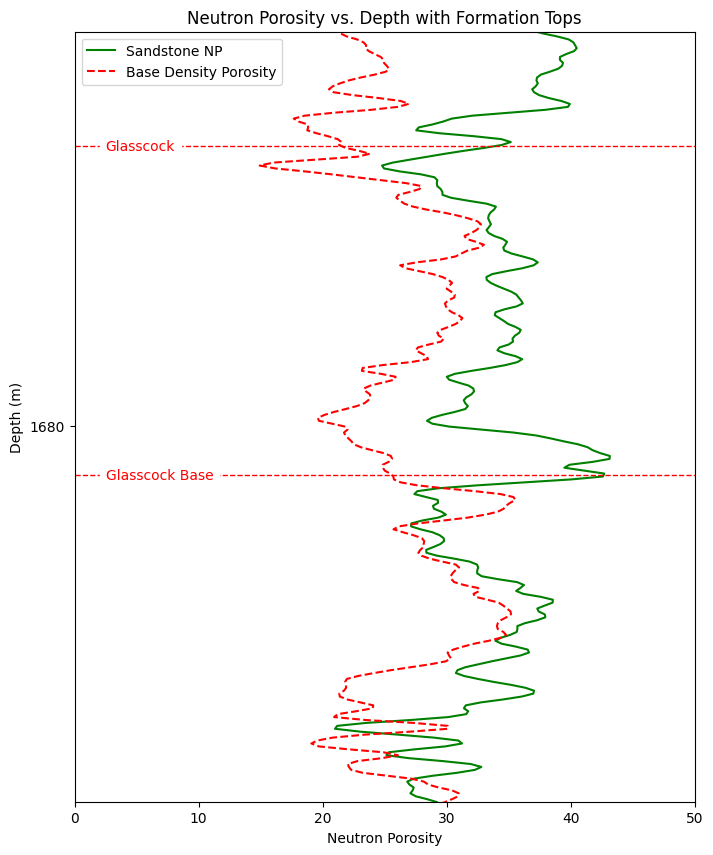

In [137]:
# Plotting the selected log against depth
plt.figure(figsize=(8, 10))
# plt.plot(log_DPRD, depths, color='blue', linestyle='--', label='Dolomite DP')
# plt.plot(log_DPRL, depths, color='red', linestyle='--', label='Limestone DP')

plt.plot(log_NPRS, depths, color='green', linestyle='-', label='Sandstone NP')


# plt.plot(log_DPRS, depths, color='green', linestyle='--', label='Sandstone DP')

# plt.plot(log_NPOR, depths, color='Red', linestyle='-', label='Base Neutron Porosity')
plt.plot(log_DPOR, depths, color='Red', linestyle='--', label='Base Density Porosity')



plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Neutron Porosity')
plt.ylabel('Depth (m)')
plt.xlim(0, 50)

plt.ylim(1700, 1660)

plt.title(f'Neutron Porosity vs. Depth with Formation Tops')
plt.legend()
plt.show()

## Gamma Ray Log

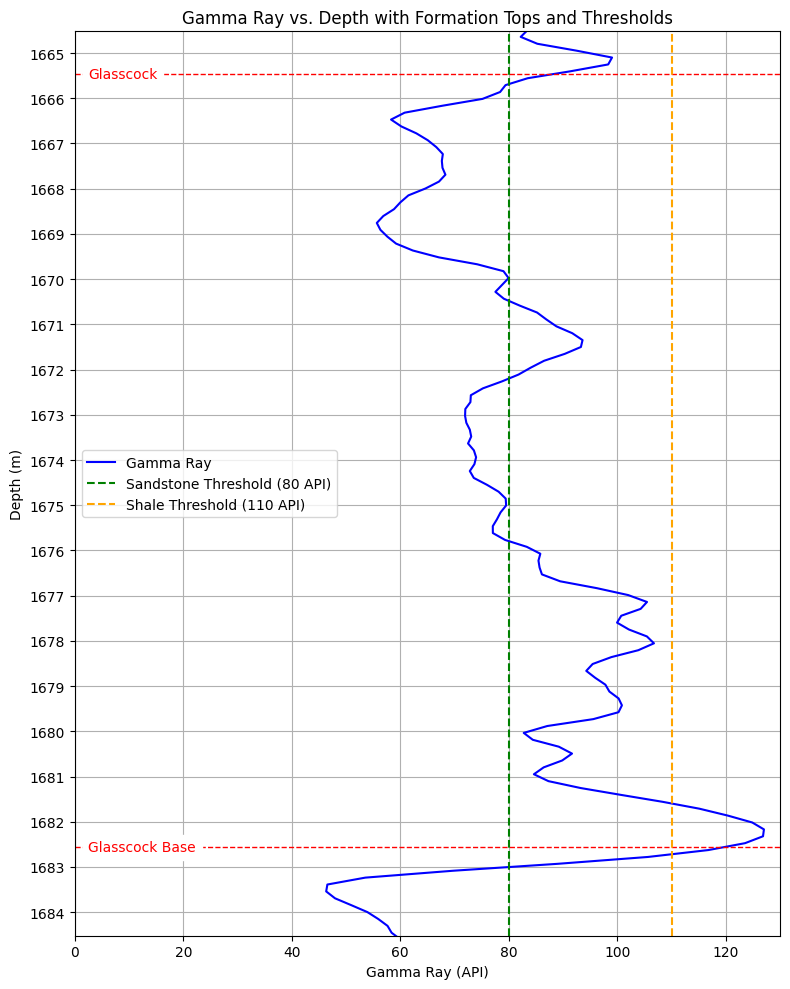

In [138]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_GRGC = log_data[:, 3]  # Customize this based on your parameter names

# Plotting the selected log against depth
plt.figure(figsize=(8, 10))

# Plot the Gamma Ray log against depth
plt.plot(log_GRGC, depths, color='blue', label='Gamma Ray')

# Invert the y-axis to have depth increase downwards (common in well logging)
plt.gca().invert_yaxis()

# Set y-axis range for depth (adjust based on your depth range)

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Mark Gamma Ray thresholds for sandstone and shale
gr_sandstone_threshold = 80  # Gamma Ray value for sandstone
gr_shale_threshold = 110  # Gamma Ray value for shale

# Add vertical lines to mark these thresholds
plt.axvline(x=gr_sandstone_threshold, color='green', linestyle='--', label='Sandstone Threshold (80 API)')
plt.axvline(x=gr_shale_threshold, color='orange', linestyle='--', label='Shale Threshold (110 API)')

# Set depth ticks for y-axis at 1 meter intervals
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 1  # Set the interval to 1 meter
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Gamma Ray (API)')
plt.ylabel('Depth (m)')
plt.xlim(0, 130)

plt.ylim(1685, 1665)  # Example limits, adjust as needed

# Title and legend
plt.title(f'Gamma Ray vs. Depth with Formation Tops and Thresholds')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


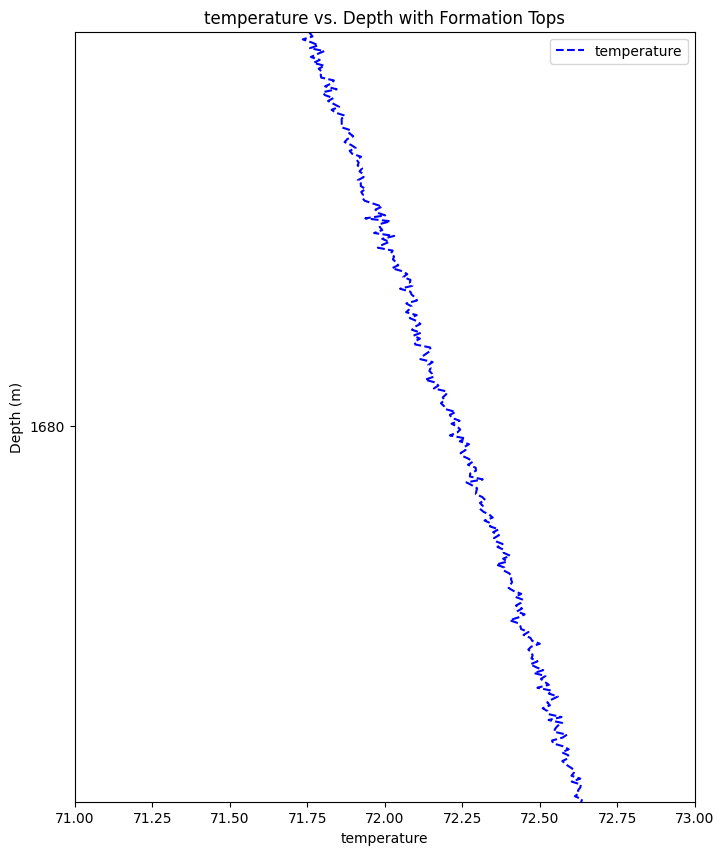

In [151]:
log_CGXT = log_data[:, 0] # Customize this based on your parameter names

log_CGXT_C = (log_CGXT - 32) * 5.0 / 9.0

# Plotting the selected log against depth
plt.figure(figsize=(8, 10))


plt.plot(log_CGXT_C, depths, color='blue', linestyle='--', label='temperature')





plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth

# Mark formation tops with labels
# Mark formation tops with labels

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('temperature')
plt.ylabel('Depth (m)')

plt.xlim(71, 73)

plt.ylim(1700, 1660)

plt.title(f'temperature vs. Depth with Formation Tops')
plt.legend()
plt.show()


## test for resivitivity

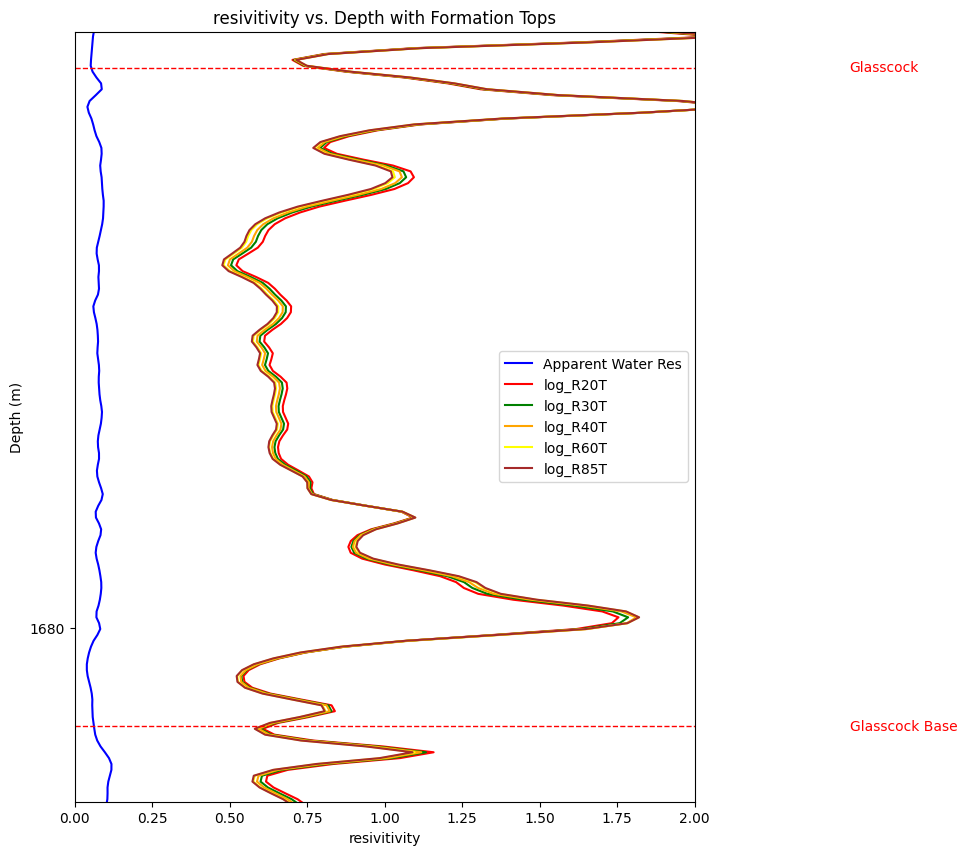

In [140]:
log_RWA = log_data[:, 8] # Apparent Water Res.
log_R20T = log_data[:, 11] # Array Ind. Two Res 20
log_R30T = log_data[:, 12] # Array Ind. Two Res 30
log_R40T = log_data[:, 13] # Array Ind. Two Res 40
log_R60T = log_data[:, 14] # Array Ind. Two Res 60
log_R85T = log_data[:, 15] # Array Ind. Two Res 85

# Plotting the selected log against depth
plt.figure(figsize=(8, 10))


plt.plot(log_RWA, depths, color='blue', linestyle='-', label='Apparent Water Res')

plt.plot(log_R20T, depths, color='red', linestyle='-', label='log_R20T')
plt.plot(log_R30T, depths, color='green', linestyle='-', label='log_R30T')
plt.plot(log_R40T, depths, color='orange', linestyle='-', label='log_R40T')
plt.plot(log_R60T, depths, color='yellow', linestyle='-', label='log_R60T')
plt.plot(log_R85T, depths, color='brown', linestyle='-', label='log_R85T')




plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', color='red', backgroundcolor='white')
# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('resivitivity')
plt.ylabel('Depth (m)')

plt.xlim(0, 2)

plt.ylim(1685, 1665)  # Example limits, adjust as needed

plt.title('resivitivity vs. Depth with Formation Tops')
plt.legend()
plt.show()


In [141]:
log_NPOR = log_data[:, 18] # Base Neutron Porosity

log_DPOR = log_data[:, 21] # Base Density Porosity (exact the same with sandstone Density porosity)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


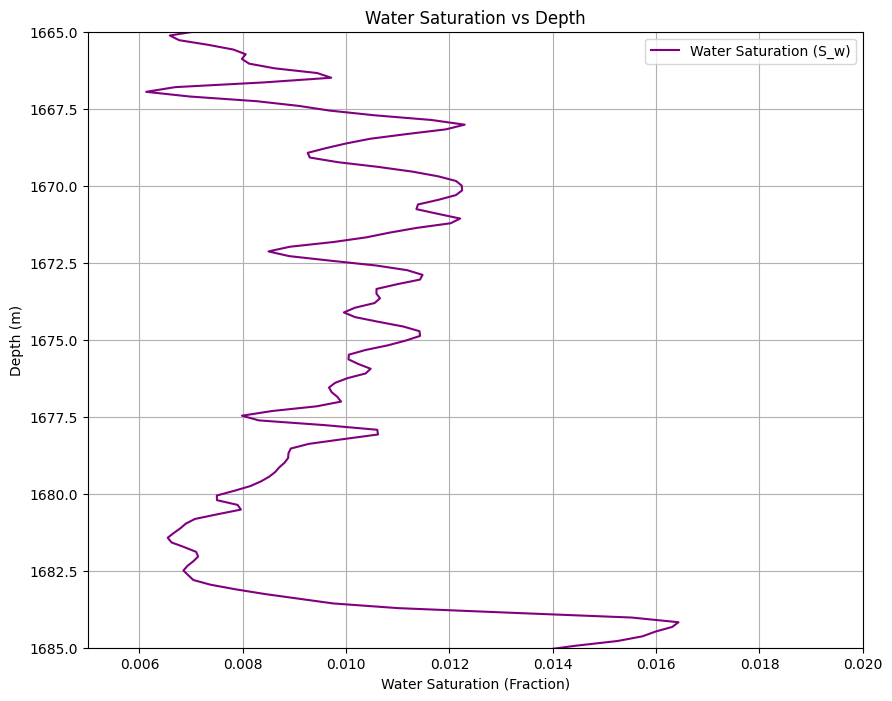

In [142]:
# Constants for Archie Equation
a = 1.0  # Tortuosity factor (for clean sands, a is typically 1)
m = 2.0  # Cementation exponent (typically 2 for sands)
n = 2.0  # Saturation exponent

# Calculating water saturation (S_w) using Archie equation
S_w = (a * log_RWA / (log_NPOR**m * log_R60T))**(1/n)



# Plot Water Saturation vs Depth
plt.figure(figsize=(10, 8))
plt.plot(S_w, depths, label='Water Saturation (S_w)', color='purple')
plt.gca().invert_yaxis()  # Invert the depth axis
plt.xlabel('Water Saturation (Fraction)')
plt.ylabel('Depth (m)')


plt.xlim(0.005, 0.02)

plt.ylim(1685, 1665)  # Example limits, adjust as needed
plt.title('Water Saturation vs Depth')
plt.grid()
plt.legend()
plt.show()


In [143]:
# log_NPOR = log_data[:, 18] # Base Neutron Porosity

#log_DPOR = log_data[:, 21] # Base Density Porosity (exact the same with sandstone Density porosity)

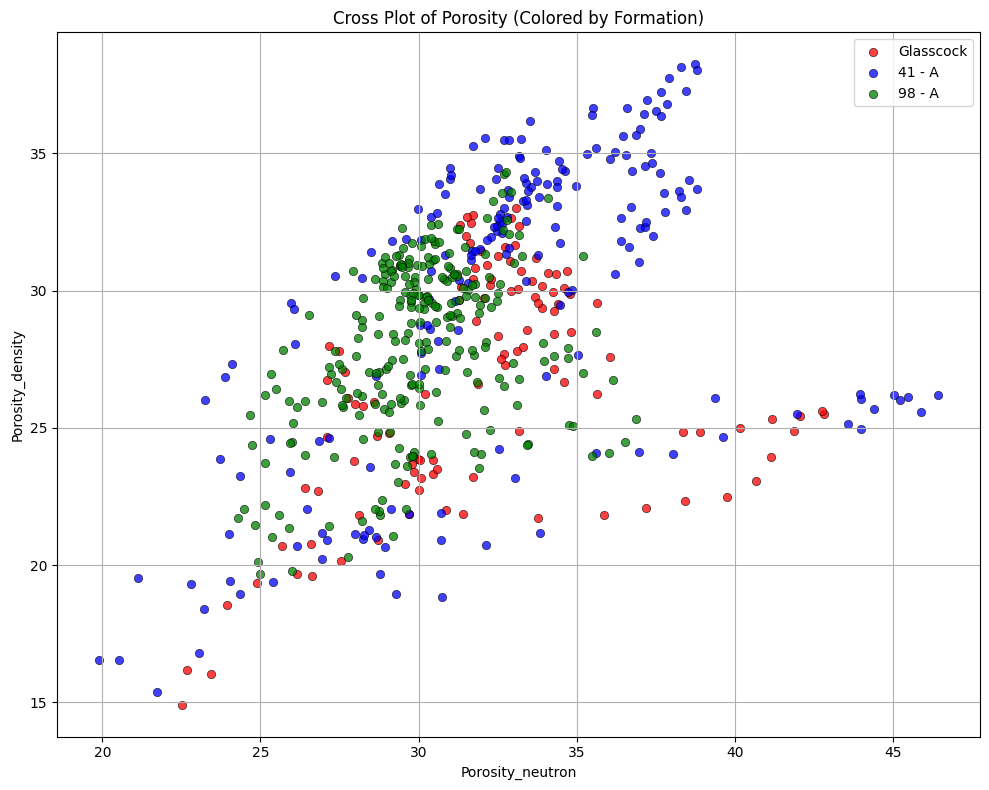

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Formation data
formations = [
#    {"name": "Greta", "top": 5084.82 * 0.3048, "bottom": 5239.32 * 0.3048},
    {"name": "Glasscock", "top": 5465.68 * 0.3048, "bottom": 5521.79 * 0.3048},
#    {"name": "Ward", "top": 5646.74 * 0.3048, "bottom": 5694.34 * 0.3048},
    {"name": "41 - A", "top": 5711.09 * 0.3048, "bottom": 5809.12 * 0.3048},
    {"name": "98 - A", "top": 6140.09 * 0.3048, "bottom": 6270.3 * 0.3048}
]

# Assign formation to each depth
def assign_formation(md):
    for formation in formations:
        if formation["top"] <= md < formation["bottom"]:
            return formation["name"]
    return "Unknown"

# Create the DataFrame with Depth, Porosity, and P-wave velocity
# Assuming log_NPRL, log_DTC, and depths are arrays of data
df_sorted = pd.DataFrame({
    'Depth': depths,
    'Porosity_density':log_DPOR,  # Convert porosity from percentage to fraction
    'Porosity_neutron':log_NPOR,  # Convert DTC to P-wave velocity in meters per second
})

# Apply the formation assignment based on depth
df_sorted['Formation'] = df_sorted['Depth'].apply(assign_formation)

# Define colors for formations
formation_colors = {
    "Glasscock": 'red',
    "41 - A": 'blue',
    "98 - A": 'green'
}

# Create a plot
plt.figure(figsize=(10, 8))

# Plot: Vp vs. Porosity colored by formation
for formation in formation_colors.keys():
    subset = df_sorted[df_sorted['Formation'] == formation]
    plt.scatter(subset['Porosity_neutron'], subset['Porosity_density'], 
                color=formation_colors[formation], 
                label=formation, alpha=0.75, edgecolor='k', linewidth=0.5)

# Labeling and grid
plt.xlabel('Porosity_neutron')
plt.ylabel('Porosity_density')
plt.title('Cross Plot of Porosity (Colored by Formation)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

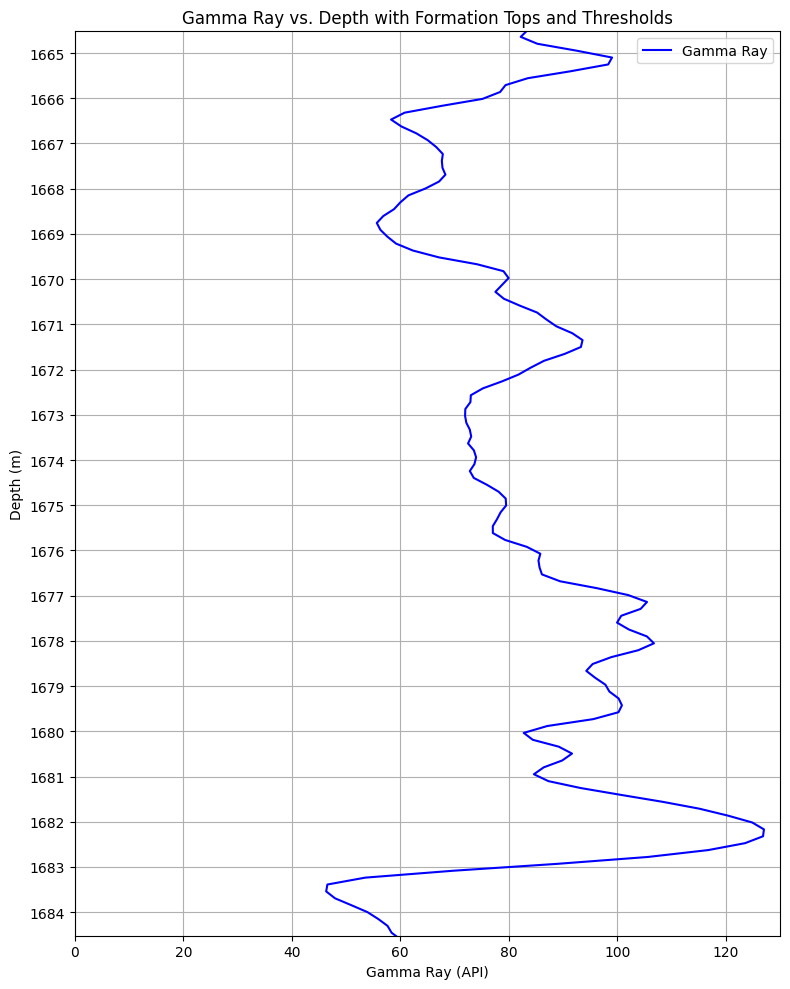

In [145]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_GRGC = log_data[:, 3]  # Customize this based on your parameter names

# Plotting the selected log against depth
plt.figure(figsize=(8, 10))

# Plot the Gamma Ray log against depth
plt.plot(log_GRGC, depths, color='blue', label='Gamma Ray')

# Invert the y-axis to have depth increase downwards (common in well logging)
plt.gca().invert_yaxis()



# Set depth ticks for y-axis at 1 meter intervals
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 1  # Set the interval to 1 meter
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Gamma Ray (API)')
plt.ylabel('Depth (m)')
plt.xlim(0, 130)

plt.ylim(1685, 1665)  # Example limits, adjust as needed

# Title and legend
plt.title(f'Gamma Ray vs. Depth with Formation Tops and Thresholds')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

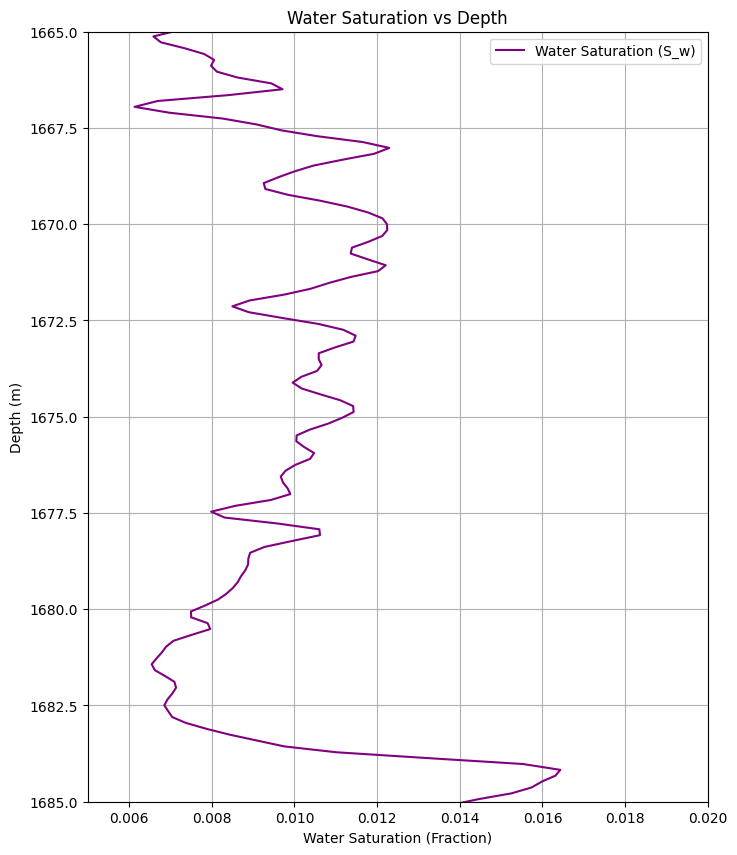

In [146]:
# Plot Water Saturation vs Depth
plt.figure(figsize=(8, 10))
plt.plot(S_w, depths, label='Water Saturation (S_w)', color='purple')
plt.gca().invert_yaxis()  # Invert the depth axis
plt.xlabel('Water Saturation (Fraction)')
plt.ylabel('Depth (m)')


plt.xlim(0.005, 0.02)

plt.ylim(1685, 1665)  # Example limits, adjust as needed
plt.title('Water Saturation vs Depth')
plt.grid()
plt.legend()
plt.show()


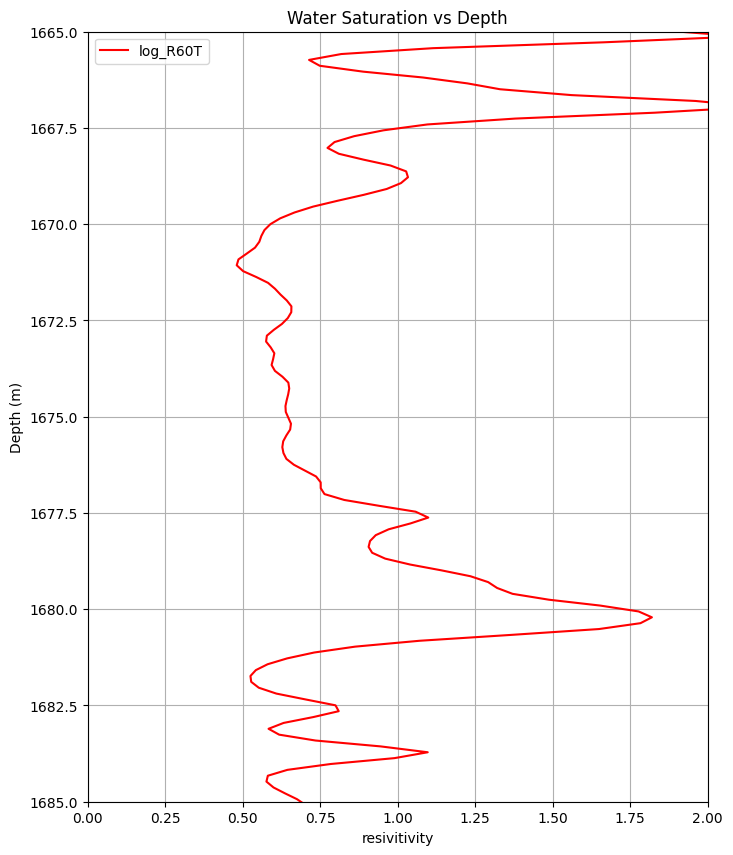

In [147]:
# Plot Water Saturation vs Depth
plt.figure(figsize=(8, 10))
plt.plot(log_R60T, depths, label='log_R60T', color='red')
plt.gca().invert_yaxis()  # Invert the depth axis
plt.xlabel('resivitivity')
plt.ylabel('Depth (m)')


plt.xlim(0, 2)

plt.ylim(1685, 1665)  # Example limits, adjust as needed
plt.title('Water Saturation vs Depth')
plt.grid()
plt.legend()
plt.show()

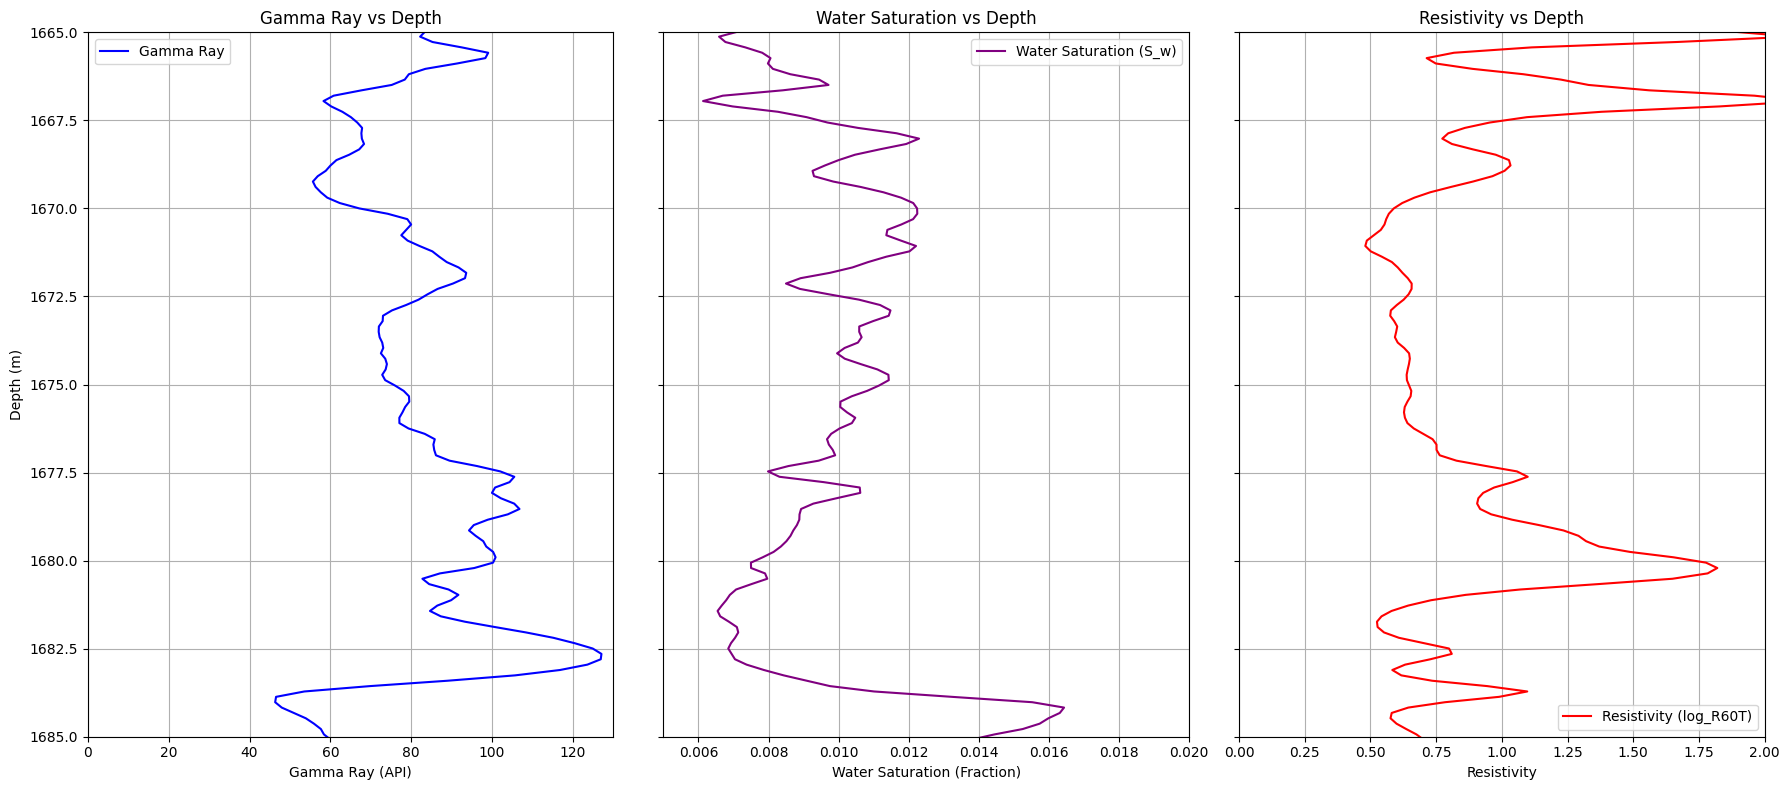

In [148]:
# Create a figure with 3 subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# Plot 1: Gamma Ray vs Depth
axes[0].plot(log_GRGC, depths, color='blue', label='Gamma Ray')
axes[0].invert_yaxis()  # Invert the depth axis
axes[0].set_xlabel('Gamma Ray (API)')
axes[0].set_xlim(0, 130)
axes[0].set_title('Gamma Ray vs Depth')
axes[0].grid(True)
axes[0].legend()

# Plot 2: Water Saturation vs Depth
axes[1].plot(S_w, depths, color='purple', label='Water Saturation (S_w)')
axes[1].invert_yaxis()  # Invert the depth axis (this will be shared with the first plot)
axes[1].set_xlabel('Water Saturation (Fraction)')
axes[1].set_xlim(0.005, 0.02)
axes[1].set_title('Water Saturation vs Depth')
axes[1].grid(True)
axes[1].legend()

# Plot 3: Resistivity vs Depth
axes[2].plot(log_R60T, depths, color='red', label='Resistivity (log_R60T)')
axes[2].invert_yaxis()  # Invert the depth axis (this will be shared with the other plots)
axes[2].set_xlabel('Resistivity')
axes[2].set_xlim(0, 2)
axes[2].set_title('Resistivity vs Depth')
axes[2].grid(True)
axes[2].legend()

# Set common Y-axis label
axes[0].set_ylabel('Depth (m)')
plt.ylim(1685, 1665)  # Set the same depth range for all subplots

# Show the plots with proper layout
plt.tight_layout()
plt.show()